In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
shuffle_split = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)

(1151, 19)

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
tuned_parameters2 = [{'max_depth':[1,2,3,4,5,6], 'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6],'n_estimators': [50,100,200,300,500], 'random_state': [0] }]
clf_treeBoost = GridSearchCV(GradientBoostingClassifier(), tuned_parameters2,  cv=shuffle_split,return_train_score=True)
clf_treeBoost.fit(X_train, Y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=0.8),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'n_estimators': [50, 100, 200, 300, 500], 'random_state': [0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [3]:
 print("Best parameters set found on development set:")
print()
print(clf_treeBoost.best_params_)
print()
print("mean training score for boosting:")
print()
print(clf_treeBoost.cv_results_['mean_train_score'])
print("mean test score for boosting:")
print()
print(clf_treeBoost.cv_results_['mean_test_score'])
print()
print("Final real Test set score for boosting: {:.2f}".format(clf_treeBoost.score(X_test, Y_test)))

Best parameters set found on development set:

{'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 100, 'random_state': 0}

mean training score for boosting:

[ 0.58229814  0.64829193  0.66242236  0.67034161  0.68990683  0.65745342
  0.6765528   0.71118012  0.73975155  0.77903727  0.69906832  0.73167702
  0.78354037  0.82236025  0.87127329  0.74627329  0.79596273  0.85947205
  0.89503106  0.93975155  0.80885093  0.85791925  0.91552795  0.94937888
  0.97841615  0.85636646  0.90791925  0.95450311  0.97996894  0.99658385
  0.66677019  0.69052795  0.7242236   0.74006211  0.76118012  0.72267081
  0.77996894  0.84440994  0.8818323   0.93649068  0.80590062  0.87531056
  0.93819876  0.97111801  0.99440994  0.87857143  0.93680124  0.98726708
  0.99875776  1.          0.93649068  0.97872671  0.99968944  1.          1.
  0.97003106  0.99720497  1.          1.          1.          0.69208075
  0.72484472  0.75186335  0.77003106  0.79456522  0.77810559  0.84658385
  0.91257764  0.95714286  0.988

In [5]:
resultsBoost = pd.DataFrame(clf_treeBoost.cv_results_)
rt=resultsBoost[resultsBoost['param_max_depth']==4]
rt2=rt[rt['param_learning_rate']==0.4]
rt3=rt[rt['param_n_estimators']==100]
 

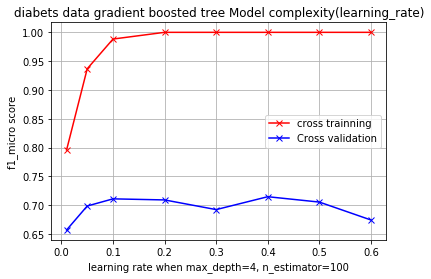

In [10]:
btreeBoost=rt3['param_learning_rate'].values
plt.grid()
plt.plot(btreeBoost,rt3['mean_train_score'],'x-',color="r")
plt.plot(btreeBoost,rt3['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('learning rate when max_depth=4, n_estimator=100')
plt.ylabel('f1_micro score')
plt.title('diabets data gradient boosted tree Model complexity(learning_rate)')
plt.show()

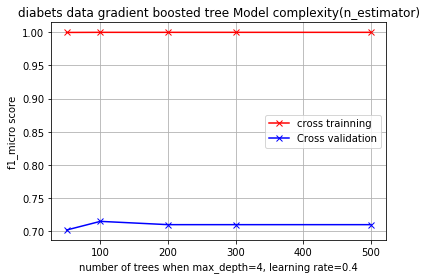

In [9]:
btreeBoost=rt2['param_n_estimators'].values
plt.grid()
plt.plot(btreeBoost,rt2['mean_train_score'],'x-',color="r")
plt.plot(btreeBoost,rt2['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('number of trees when max_depth=4, learning rate=0.4')
plt.ylabel('f1_micro score')
plt.title('diabets data gradient boosted tree Model complexity(n_estimator)')
plt.show()

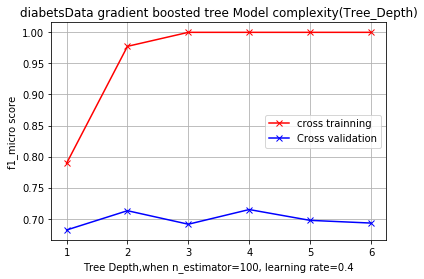

In [18]:
resultsBoost = pd.DataFrame(clf_treeBoost.cv_results_)
rtb=resultsBoost[resultsBoost['param_learning_rate']==0.4]
rt3b=rtb[rtb['param_n_estimators']==100]
btreeBoost=rt3b['param_max_depth'].values
plt.grid()
plt.plot(btreeBoost,rt3b['mean_train_score'],'x-',color="r")
plt.plot(btreeBoost,rt3b['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('Tree Depth,when n_estimator=100, learning rate=0.4')
plt.ylabel('f1_micro score')
plt.title('diabetsData gradient boosted tree Model complexity(Tree_Depth)')
plt.show()

In [21]:
sample_size=np.arange(50,560,20)
shuffle_split2 = ShuffleSplit(test_size=.1, train_size=.9, n_splits=10)
from sklearn.model_selection import learning_curve
samples, sample_train, sample_valid=learning_curve(GradientBoostingClassifier(n_estimators=100,max_depth=4,learning_rate=0.4,random_state=0), X_train, Y_train,  train_sizes=sample_size, cv=shuffle_split2)


Text(0,0.5,'score')

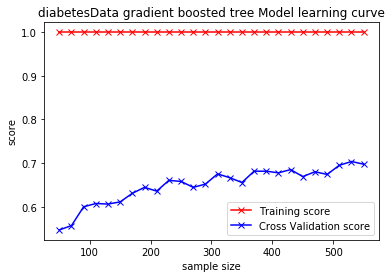

In [22]:
plt.plot(samples, np.mean(sample_train,axis=1),'x-', color="r",label="Training score")
plt.plot(samples, np.mean(sample_valid,axis=1), 'x-', color="b",label="Cross Validation score")
plt.legend(loc="best")
plt.title('diabetesData gradient boosted tree Model learning curve')
plt.xlabel('sample size')
plt.ylabel('score')

In [19]:
display(rt3b)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,param_random_state,params,rank_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
151,0.043766,0.000408,0.681988,0.789286,0.4,1,100,0,"{'learning_rate': 0.4, 'max_depth': 1, 'n_esti...",193,...,0.664596,0.798137,0.670807,0.798137,0.745342,0.790373,0.001825,0.000018,0.044600,0.006735
156,0.071029,0.000472,0.713043,0.977484,0.4,2,100,0,"{'learning_rate': 0.4, 'max_depth': 2, 'n_esti...",4,...,0.714286,0.976708,0.720497,0.976708,0.701863,0.972050,0.002586,0.000020,0.026614,0.004004
161,0.105953,0.000554,0.691304,1.000000,0.4,3,100,0,"{'learning_rate': 0.4, 'max_depth': 3, 'n_esti...",152,...,0.701863,1.000000,0.664596,1.000000,0.726708,1.000000,0.004885,0.000023,0.043748,0.000000
166,0.151712,0.000637,0.714907,1.000000,0.4,4,100,0,"{'learning_rate': 0.4, 'max_depth': 4, 'n_esti...",1,...,0.708075,1.000000,0.757764,1.000000,0.763975,1.000000,0.004837,0.000029,0.041615,0.000000
171,0.206988,0.000767,0.697516,1.000000,0.4,5,100,0,"{'learning_rate': 0.4, 'max_depth': 5, 'n_esti...",110,...,0.683230,1.000000,0.689441,1.000000,0.720497,1.000000,0.004826,0.000144,0.028061,0.000000
176,0.277349,0.000866,0.693168,1.000000,0.4,6,100,0,"{'learning_rate': 0.4, 'max_depth': 6, 'n_esti...",141,...,0.683230,1.000000,0.670807,1.000000,0.757764,1.000000,0.009147,0.000058,0.039106,0.000000
